In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
songs = pd.read_csv('data/spotify/dataset.csv')
songs.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
songs.dropna(inplace=True)

In [5]:
len(songs['track_genre'].unique())

114

**Observation:** 
 - There are total 114 unique genres in this dataset.
 - Each genre has 1000 songs.

In [6]:
songs['key'].value_counts()

key
7     13244
0     13061
2     11644
9     11313
1     10772
5      9368
11     9282
4      9008
6      7921
10     7456
8      7360
3      3570
Name: count, dtype: int64

In [7]:
songs['explicit'].value_counts()

explicit
False    104252
True       9747
Name: count, dtype: int64

In [8]:
songs['danceability'].value_counts()

danceability
0.6470    431
0.6090    357
0.5790    347
0.6850    335
0.6020    334
         ... 
0.0663      1
0.0779      1
0.0792      1
0.0569      1
0.0880      1
Name: count, Length: 1174, dtype: int64

Text(0.5, 1.0, 'Frequency Distribution of Energy')

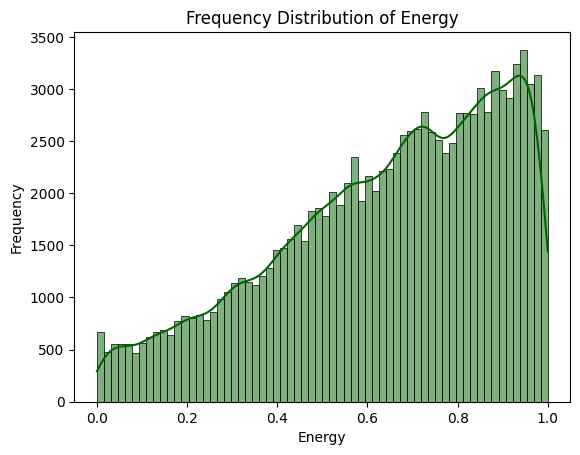

In [9]:
sns.histplot(songs['energy'],color='darkgreen', kde=True)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Energy')

In [10]:
songs.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

Text(0.5, 1.0, 'Frequency Distribution of danceability')

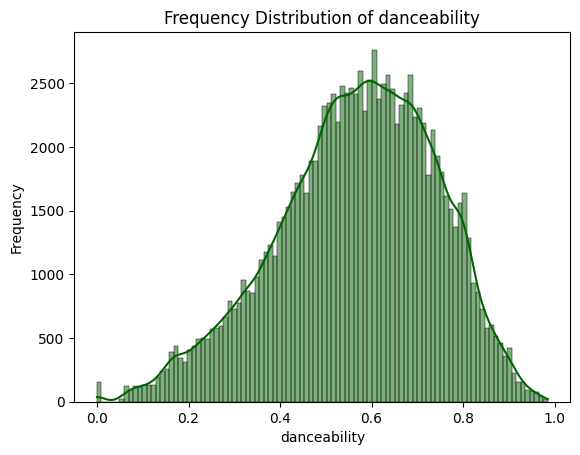

In [11]:
sns.histplot(songs['danceability'],color='darkgreen', kde=True)
plt.xlabel('danceability')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of danceability')

Text(0.5, 1.0, 'Frequency Distribution of loudness')

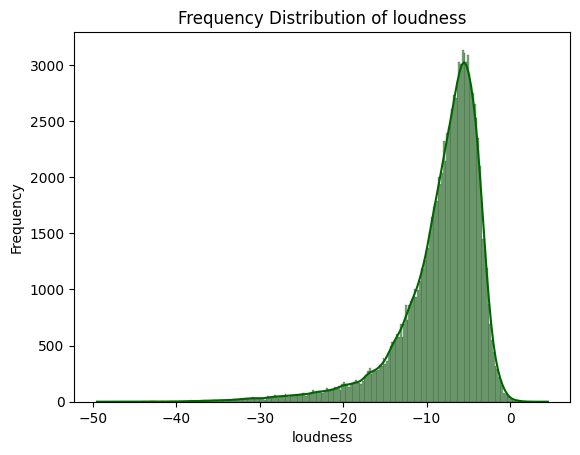

In [12]:
sns.histplot(songs['loudness'],color='darkgreen', kde=True)
plt.xlabel('loudness')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of loudness')

In [13]:
temp = songs[:1000]

<Axes: xlabel='loudness', ylabel='popularity'>

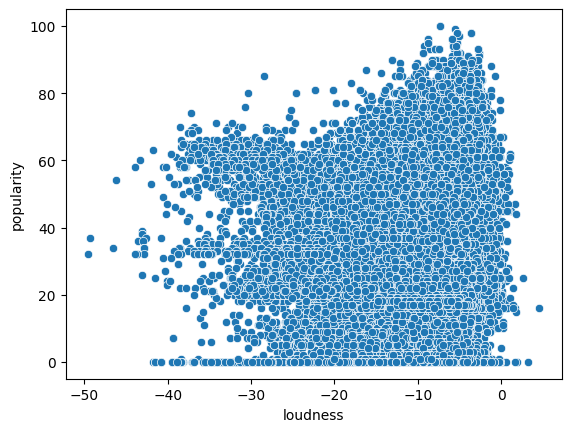

In [14]:
sns.scatterplot(x=songs['loudness'],y=songs['popularity'])

In [15]:
songs[songs['popularity']>60]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113091,113091,1sF4VadVaVTvp9WTEy79JT,Vertical Worship,Bright Faith Bold Future,Yes I Will,64,234731,False,0.430,0.7080,...,-7.140,1,0.0336,0.0561,0.000000,0.7040,0.2430,75.024,4,world-music
113100,113100,3BDpn2Vivr1BFhlGsYs5tp,Housefires,Housefires III,Build My Life,62,491690,False,0.303,0.4780,...,-7.851,1,0.0352,0.3710,0.000000,0.1310,0.1170,139.795,4,world-music
113136,113136,5GDtkgG9T1BDknHHyDtghv,Cory Asbury,The Father's House,The Father's House - Studio,62,253640,False,0.408,0.7070,...,-5.400,1,0.0341,0.1890,0.000000,0.6260,0.3330,161.962,4,world-music
113170,113170,35GACeX8Zl55jp29xFbvvo,Mosaic MSC,Glory & Wonder,Tremble - Live,61,309093,False,0.329,0.6820,...,-6.374,1,0.0526,0.2210,0.000000,0.1900,0.1620,148.029,4,world-music


In [16]:
songs[songs['acousticness']>0.6]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.924,0.000006,0.1010,0.2670,77.489,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.905,0.000071,0.1320,0.1430,181.740,3,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,acoustic
11,11,5ivF4eQBqJiVL5IAE9jRyl,Jason Mraz,Love Is a Four Letter Word,I Won't Give Up,69,240165,False,0.483,0.3030,...,-10.058,1,0.0429,0.694,0.000000,0.1150,0.1390,133.406,3,acoustic
12,12,4ptDJbJl35d7gQfeNteBwp,Dan Berk,Solo,Solo,52,198712,False,0.489,0.3140,...,-9.245,0,0.0331,0.749,0.000000,0.1130,0.6070,124.234,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,113994,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",22,305454,False,0.331,0.1710,...,-15.668,1,0.0350,0.920,0.022900,0.0679,0.3270,132.147,3,world-music
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.640,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.994,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.867,0.000000,0.0839,0.7430,132.378,4,world-music


In [17]:
songs['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [18]:
songs = songs.drop(labels=['Unnamed: 0','duration_ms','time_signature','key','explicit','loudness','speechiness'],axis=1)

**We'll create a tag feature out of these features**
- artists 
- track_genre
- danceability
- energy
- acousticness
- mode
- instrumentalness
- liveness
- valence
- tempo
- popularity

In [19]:
songs[songs['liveness']>0.8]

,track_id,artists,album_name,track_name,popularity,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo,track_genre
518,6Fomnvc3pkLvUQYUkhiQPx,Canyon City,Midnight Waves,Waves,45,0.407,0.357,1,0.775000,0.001050,0.940,0.25300,112.207,acoustic
784,2bjfXe8SOsCl17b29eGLvg,Eddie Vedder,Into The Wild (Music For The Motion Picture),No More - Live,45,0.337,0.605,1,0.862000,0.003100,0.944,0.42400,59.327,acoustic
946,3ZoefygM1VYbvEYXXRNAY2,Violent Femmes,Add It Up (1981-1993),"Dance, Motherfucker, Dance!",27,0.308,0.854,1,0.059300,0.007180,0.903,0.68900,193.395,acoustic
1032,2e1FJPgVRQZFT53QKUR7BD,Criolo;Emicida,Criolo E Emicida Ao Vivo (Live),A Cada Vento - Live,41,0.651,0.861,0,0.430000,0.000000,0.981,0.80000,98.474,afrobeat
1047,6F4zAdEznwkmn8MHJtcjtT,Criolo;Emicida,Criolo E Emicida Ao Vivo (Live),Zica Vai Lá - Live,35,0.374,0.934,1,0.058000,0.000000,0.804,0.38900,167.661,afrobeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113922,4XMIXntvfwPbMnmUbZuNMT,Planetshakers,Legacy (Live),Passion - Live In Melbourne,37,0.542,0.868,1,0.000038,0.008410,0.978,0.49800,131.956,world-music
113934,73EIpn5AcedCWPOmxWMxH9,Passion;Kristian Stanfill,Passion: Everything Glorious,Jesus Paid It All,47,0.317,0.562,1,0.092500,0.000000,0.893,0.21800,76.915,world-music
113935,6aqfqfzU1GjtKQb3ujUMGb,Reiki Armonía,Sonidos de Fondo para Reiki: Gotas de Agua,"Para Reiki: Gotas de Agua, Pt. 17",22,0.118,0.927,0,0.154000,0.985000,0.893,0.00398,150.370,world-music
113938,30bAlHDwEyu2iI1O6WVasv,Hillsong Worship;Brooke Ligertwood,Awake,Awake My Soul - Live,40,0.267,0.484,1,0.002840,0.000003,0.946,0.20600,126.865,world-music


In [20]:
songs[songs['valence']>0.7]

,track_id,artists,album_name,track_name,popularity,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,0.676,0.461,0,0.0322,0.000001,0.3580,0.715,87.917,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,0.703,0.444,1,0.5590,0.000000,0.0973,0.712,150.960,acoustic
20,3S0OXQeoh0w6AY8WQVckRW,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,75,0.703,0.444,1,0.5590,0.000000,0.0973,0.712,150.960,acoustic
24,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,0.796,0.667,0,0.3810,0.000000,0.2210,0.754,97.988,acoustic
42,0e5PAxSyZ5DWWVqKANHETz,Brandi Carlile;Lucius,Country Car Hits,You and Me on the Rock,0,0.568,0.686,1,0.1500,0.000002,0.0881,0.725,172.075,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113918,5KmmiVOsTjzJhuPxXxpeGt,Chris Tomlin;Danny Gokey,Never Lose Sight (Deluxe Edition),Impossible Things,37,0.627,0.843,1,0.0034,0.000000,0.0573,0.744,96.483,world-music
113942,1QwLpfmZ6NPzjk3YFXkl0E,Cesária Evora,Voz D' Amor,Beijo Roubado,22,0.838,0.471,0,0.7980,0.000024,0.2390,0.855,103.008,world-music
113946,5XTdgvMiVHNSzzFrKAXU91,Cesária Evora,Best Of,Petit Pays,22,0.555,0.486,0,0.7900,0.000000,0.2560,0.836,156.170,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,0.629,0.329,0,0.8670,0.000000,0.0839,0.743,132.378,world-music


Categorize the tempo
- Grave – slow and solemn (20–40 BPM)
- Lento – slowly (40–45 BPM)
- Largo – broadly (45–50 BPM)
- Adagio – slow and stately (literally, “at ease”) (55–65 BPM)
- Adagietto – rather slow (65–69 BPM)
- Andante – at a walking pace (73–77 BPM)
- Moderato – moderately (86–97 BPM)
- Allegretto – moderately fast (98–109 BPM)
- Allegro – fast, quickly and bright (109–132 BPM)
- Vivace – lively and fast (132–140 BPM)
- Presto – extremely fast (168–177 BPM)
- Prestissimo – even faster than Presto (178 BPM and over)

In [21]:
def categorize_tempo(tempo):
    if tempo <= 40:
        return 'Grave'
    elif tempo <= 45:
        return 'Lento'
    elif tempo <= 50:
        return 'Largo'
    elif tempo <= 65:
        return 'Adagio'
    elif tempo <= 69:
        return 'Adagietto'
    elif tempo <= 77:
        return 'Andante'
    elif tempo <= 97:
        return 'Moderato'
    elif tempo <= 109:
        return 'Allegretto'
    elif tempo <= 132:
        return 'Allegro'
    elif tempo <= 140:
        return 'Vivace'
    elif tempo <= 177:
        return 'Presto'
    else:
        return 'Prestissimo'

songs['tempo'] = songs['tempo'].apply(categorize_tempo)

In [22]:
songs['tempo']

0            Moderato
1            Moderato
2             Andante
3         Prestissimo
4             Allegro
             ...     
113995        Allegro
113996       Moderato
113997         Vivace
113998         Vivace
113999       Moderato
Name: tempo, Length: 113999, dtype: object

In [23]:
def create_tags(row):
    # danceability: > 0.6 dance
    # energy: > 0.6 energised
    # popularity: > 60  popular
    # acousticness: > 0.6 acoustic
    # mode: 1 major, 0 minor
    # liveness: > 0.8 live 
    # valence: > 0.6 happy else sad
    tag = []
    if row.at['danceability']>0.6:
        tag.append('dance')
    if row.at['energy']>0.6:
        tag.append('energised')
    if row.at['popularity']>60:
        tag.append('popular')
    if row.at['acousticness']>0.6:
        tag.append('acoustic')
    if row.at['mode'] == 1:
        tag.append('major')
    if row.at['mode'] == 0:
        tag.append('minor')
    if row.at['liveness']>0.8:
        tag.append('live')
    if row.at['valence']>0.6:
        tag.append('happy')
    if row.at['valence']<=0.6:
        tag.append('sad')
    if row.at['instrumentalness'] > 0.8:
        tag.append('instrumental')
    tag.append(row.at['artists'])
    tag.append(row.at['album_name'])
    tag.append(row.at['track_genre'])
    tag.append(row.at['tempo'])
    str_tag = " ".join(tag)
    return str_tag

In [24]:
tagged_data = songs.apply(create_tags, axis=1)

In [25]:
songs.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'danceability', 'energy', 'mode', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'track_genre'],
      dtype='object')

In [26]:
songs = songs.drop(labels=['artists','album_name','popularity','danceability','energy','mode','acousticness','instrumentalness','liveness','valence','tempo','track_genre'],axis=1)

In [27]:
songs['tags'] = tagged_data

In [28]:
songs.head()

,track_id,track_name,tags
0,5SuOikwiRyPMVoIQDJUgSV,Comedy,dance popular minor happy Gen Hoshino Comedy a...
1,4qPNDBW1i3p13qLCt0Ki3A,Ghost - Acoustic,acoustic major sad Ben Woodward Ghost (Acousti...
2,1iJBSr7s7jYXzM8EGcbK5b,To Begin Again,major sad Ingrid Michaelson;ZAYN To Begin Agai...
3,6lfxq3CG4xtTiEg7opyCyx,Can't Help Falling In Love,popular acoustic major sad Kina Grannis Crazy ...
4,5vjLSffimiIP26QG5WcN2K,Hold On,dance popular major sad Chord Overstreet Hold ...


In [29]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.porter import PorterStemmer

In [30]:
songs['tags'] = songs['tags'].apply(lambda x: x.lower())

In [31]:
def stem(text):
    ps = PorterStemmer()
    stemmed = []
    for i in text.split():
        stemmed.append(ps.stem(i))
    return " ".join(stemmed)

In [32]:
cv = CountVectorizer(max_features=5000)

In [33]:
songs['tags'] = songs['tags'].apply(stem)
vectors = cv.fit_transform(songs['tags']).toarray()

In [40]:
# def recommend(song):
#     suggestions = []
#     movie_index = songs[songs['track_name']==song].index[0]
#     distances = simmilarity[movie_index]
#     movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]
#     for i in movies_list:
#         print(songs.iloc[i[0]]['track_name'])
#     return suggestions

def recommend(song, vectors, songs):
    suggestions = []
    song_index = songs[songs['track_name']==song].index[0]
    song_vector = vectors[song_index].reshape(1, -1)
    distances = []
    for i in range(len(vectors)):
        if i != song_index:
            distance = cosine_similarity(song_vector, vectors[i].reshape(1, -1))
            distances.append((i, distance))
    songs_list = sorted(distances, reverse=True, key=lambda x:x[1])[1:6]
    for i in songs_list:
        suggestions.append(songs.iloc[i[0]]['track_name'])
    return suggestions

In [41]:
suggestions = recommend('Comedy', vectors, songs)

['Comedy',
 'Comedy',
 'Paz Interior',
 'Mrs. Robinson - From "The Graduate" Soundtrack',
 'Comedy']